# Exploratory Data Analysis

## Imports

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler

## Load Dataset

In [61]:
df = pd.read_csv("data\\creditcard.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data\\creditcard.csv'

## Preview Dataset

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Data Distribution

### Distribution of Fraud and Normal Transactions

In [22]:
print(f"The No. of Normal Transactions is {len(df[df['Class'] == 0])} and it accounts for {round(len(df[df['Class'] == 0])/df.shape[0]*100,2)}% of the dataset.")
print(f"The No. of Fraud Transactions is {len(df[df['Class'] == 1])} and it accounts for {round(len(df[df['Class'] == 1])/df.shape[0]*100,2)}% of the dataset.")

The No. of Normal Transactions is 284315 and it accounts for 99.83% of the dataset.
The No. of Fraud Transactions is 492 and it accounts for 0.17% of the dataset.


C:\Users\HA432CU\AppData\Local\Temp\ipykernel_46232\2409868087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=colors)


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

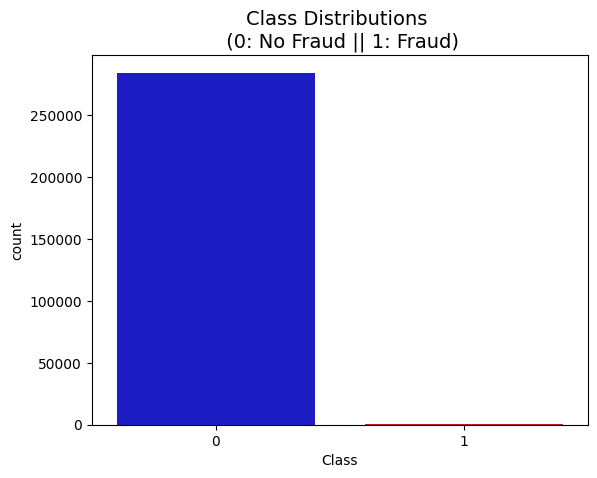

In [25]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Distribution of Fraud and Normal Transactions Amounts

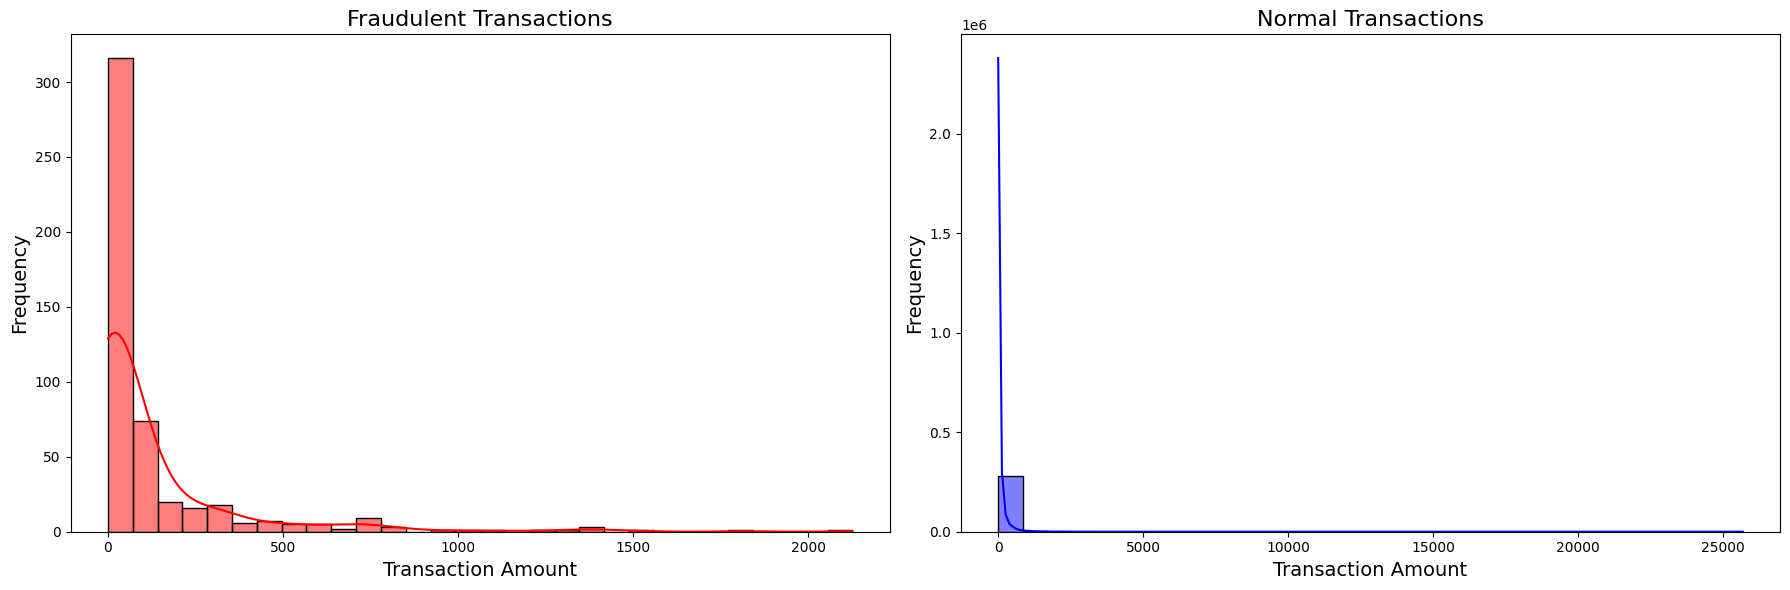

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Fraudulent transactions
sns.histplot(df[df['Class'] == 1]['Amount'], bins=30, kde=True, color='red', ax=ax[0])
ax[0].set_title('Fraudulent Transactions', fontsize=16)
ax[0].set_xlabel('Transaction Amount', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

# Normal transactions
sns.histplot(df[df['Class'] == 0]['Amount'], bins=30, kde=True, color='blue', ax=ax[1])
ax[1].set_title('Normal Transactions', fontsize=16)
ax[1].set_xlabel('Transaction Amount', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()


In [46]:
print(f"The normal transaction average amount is: {round(df[df['Class'] == 0]['Amount'].mean(),2)}")
print(f"The fraud transaction average amount is: {round(df[df['Class'] == 1]['Amount'].mean(),2)}")

The normal transaction average amount is: 88.29
The fraud transaction average amount is: 122.21


### Distribution of Time beteeen transactions

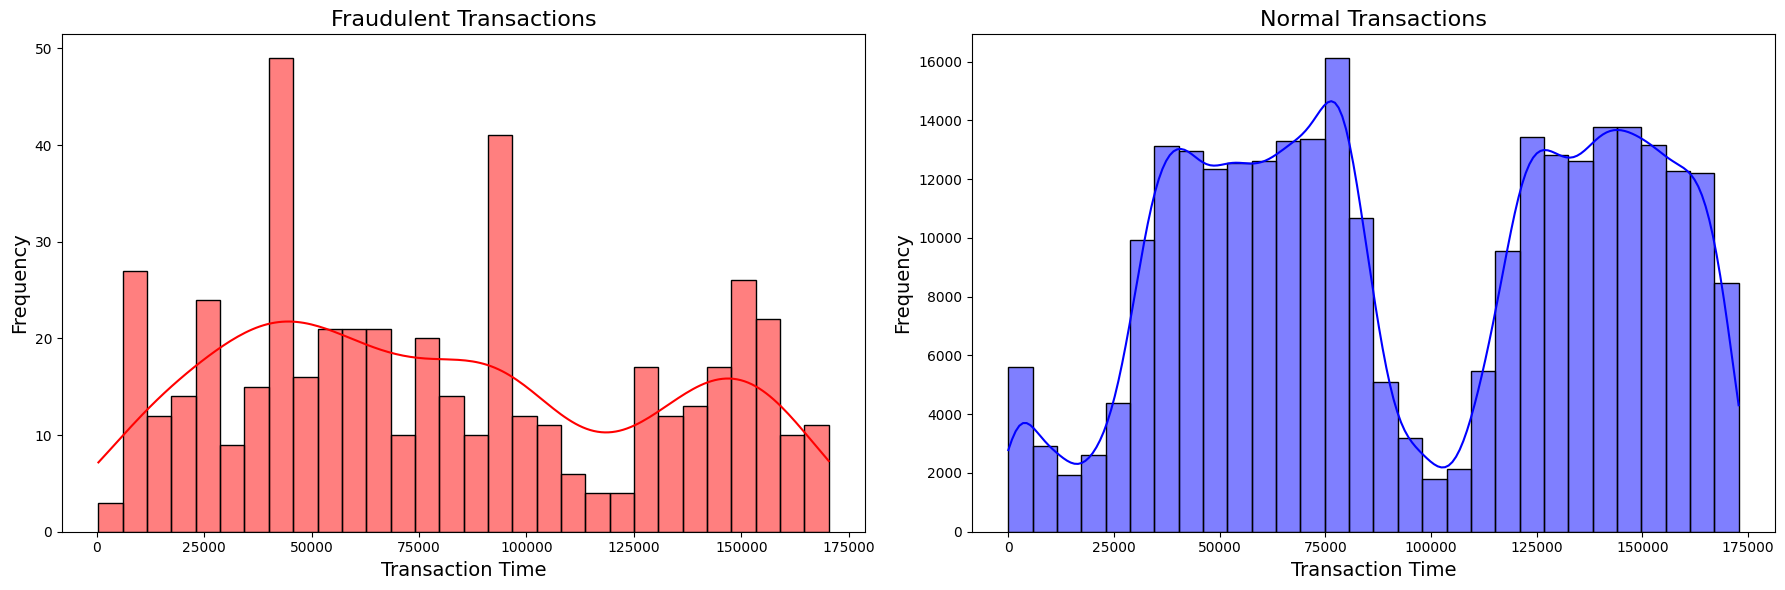

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Fraudulent transactions
sns.histplot(df[df['Class'] == 1]['Time'], bins=30, kde=True, color='red', ax=ax[0])
ax[0].set_title('Fraudulent Transactions', fontsize=16)
ax[0].set_xlabel('Transaction Time', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

# Normal transactions
sns.histplot(df[df['Class'] == 0]['Time'], bins=30, kde=True, color='blue', ax=ax[1])
ax[1].set_title('Normal Transactions', fontsize=16)
ax[1].set_xlabel('Transaction Time', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

In [47]:
print(f"The normal transaction average amount is: {round(df[df['Class'] == 0]['Time'].mean(),2)}")
print(f"The fraud transaction average amount is: {round(df[df['Class'] == 1]['Time'].mean(),2)}")

The normal transaction average amount is: 94838.2
The fraud transaction average amount is: 80746.81


## Total Fraud Amount - Expected Loss

In [49]:
print(f"The transaction total amount is: {round(df['Amount'].sum(), 2)}")
print(f"The normal transaction total amount is: {round(df[df['Class'] == 0]['Amount'].sum(),2)}")
print(f"The fraud transaction total amount is: {round(df[df['Class'] == 1]['Amount'].sum(),2)}")

The transaction total amount is: 25162590.01
The normal transaction total amount is: 25102462.04
The fraud transaction total amount is: 60127.97


## Scale Features

In [53]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [55]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_amount  284807 non-null  float64
 1   scaled_time    284807 non-null  float64
 2   V1             284807 non-null  float64
 3   V2             284807 non-null  float64
 4   V3             284807 non-null  float64
 5   V4             284807 non-null  float64
 6   V5             284807 non-null  float64
 7   V6             284807 non-null  float64
 8   V7             284807 non-null  float64
 9   V8             284807 non-null  float64
 10  V9             284807 non-null  float64
 11  V10            284807 non-null  float64
 12  V11            284807 non-null  float64
 13  V12            284807 non-null  float64
 14  V13            284807 non-null  float64
 15  V14            284807 non-null  float64
 16  V15            284807 non-null  float64
 17  V16            284807 non-nul